In [ ]:
# Adding necessary packages
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

In [1]:
function sier!(du, u, p, t)
    du[1] = p[1] * u[5] - p[1] * u[1] - p[3] * u[1] * u[3] / u[5] 
    du[2] = p[3] * u[1] * u[3] / u[5] - (p[1] + p[2]) * u[2]
    du[3] = p[2] * u[2] - (p[4] + p[1]) * u[3]
    du[4] = p[4] * u[3] - p[1] * u[4]
    du[5] = 0
end

sier! (generic function with 1 method)

In [2]:
μ = 2 # P
α = 3 # Q
β = 12
γ = 1

u0 = [2, 1, 0, 0, 3]
tspan = (0.0, 10.0)
p = [μ; α; β; γ]

4-element Vector{Int64}:
  2
  3
 12
  1

In [3]:
using DifferentialEquations
prob = ODEProblem(sier!, u0, tspan, [μ; α; β; γ])
sol = solve(prob)


retcode: Success
Interpolation: 3rd order Hermite
t: 40-element Vector{Float64}:
  0.0
  0.0005769968970566477
  0.006346965867623124
  0.021042156893680414
  0.041853720299732056
  0.06918799234674194
  0.10515648032703195
  0.1506080534132398
  0.20698252524627456
  0.2752036834129692
  ⋮
  7.180550130338604
  7.568461501020507
  7.955047895915536
  8.340962276365246
  8.726809690881682
  9.112924285187074
  9.499367505431438
  9.886036957927072
 10.0
u: 40-element Vector{Vector{Float64}}:
 [2.0, 1.0, 0.0, 0.0, 3.0]
 [2.001149339238843, 0.9971231597429654, 0.001727002589259976, 4.984289313889802e-7, 3.0]
 [2.0121384389527814, 0.9692356948957557, 0.018566699930838315, 5.916622062442248e-5, 3.0]
 [2.0361908946297027, 0.9050505591836258, 0.05813877290349143, 0.0006197732831802143, 3.0]
 [2.0615395120265743, 0.8291705394899299, 0.10699568617467271, 0.0022942623088230093, 3.0]
 [2.0816943331617876, 0.7519239714079134, 0.16061987482501144, 0.0057618206052873, 3.0]
 [2.0902633842259433, 0.6

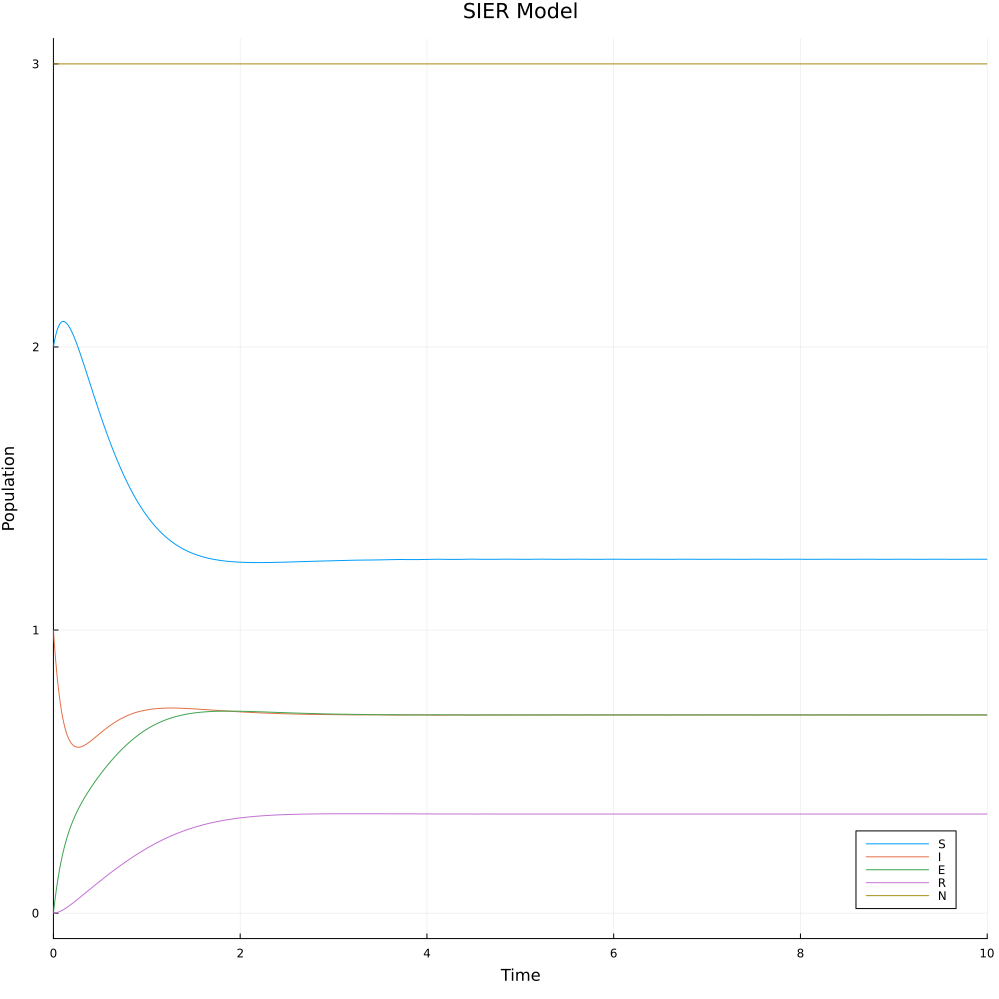

In [4]:

using Plots
p = plot(sol, title="SIER Model", label=["S" "I" "E" "R" "N"], size=(1000,1000))
xlabel!(p, "Time")
ylabel!(p, "Population")
p